# `set_vector_density`

This notebook is a simple example of the GeoCAT-viz function <a href="../user_api/generated/geocat.viz.util.set_vector_density.html#geocat-viz.util.set_vector_density">set_vector_density</a>.

In [3]:
# Import packages:

import xarray as xr
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs
from datetime import datetime

import geocat.datafiles as gdf
import geocat.viz as gv

In [4]:
# Read in the data:

# Open the netCDF data file from geocat-datafiles using xarray
ds = xr.open_dataset(gdf.get("netcdf_files/uv300.nc"))

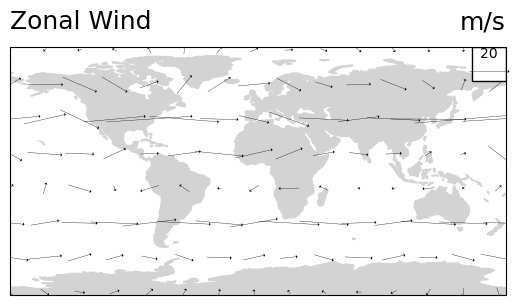

In [17]:
# Create the plot:

# Generate figure (set its size (width, height) in inches)
plt.figure()

# Generate axes using Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
z = gv.set_vector_density(ds, 20)

# Draw vector plot
# Notes

# 1. We are using the geocat-viz `set_vector_density` on line 47 as a replacement for NCL's vcMinDistanceF.
#    Note that it uses a minimum distance threshold specified as a integer in degrees rather than the NCL normalized device coordinates.
#
# 2. There is no matplotlib equivalent to "CurlyVector"
Q = plt.quiver(z['lon'],
               z['lat'],
               z['U']['time'==1],
               z['V']['time'==1],
               color='black',
               zorder=1,
               pivot="middle",
               width=0.0007,
               headwidth=10)

# Draw legend for vector plot
qk = ax.quiverkey(Q,
                  167.5,
                  72.5,
                  20,
                  r'20',
                  labelpos='N',
                  coordinates='data',
                  color='black',
                  zorder=2)

# Turn on continent shading
ax.add_feature(cartopy.feature.LAND,
               edgecolor='lightgray',
               facecolor='lightgray',
               zorder=0)

# Draw the key for the quiver plot as a rectangle patch
ax.add_patch(
    plt.Rectangle((155, 65),
                  25,
                  25,
                  facecolor='white',
                  edgecolor='black',
                  zorder=1))

# Use geocat.viz.util convenience function to add titles to left and right of the plot axis.
gv.set_titles_and_labels(ax,
                         lefttitle=ds['U'].long_name,
                         righttitle=ds['U'].units)

# Show the plot
plt.show();